<a href="https://colab.research.google.com/github/AroraAnshul301/Assignments/blob/main/Clustering%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results Summary:
                  Algorithm   Preprocessing  No. of Clusters  Silhouette Score
0                    KMeans  StandardScaler                3          0.478724
1  Agglomerative Clustering  StandardScaler                3          0.445540
2                    DBSCAN  StandardScaler                2          0.349198


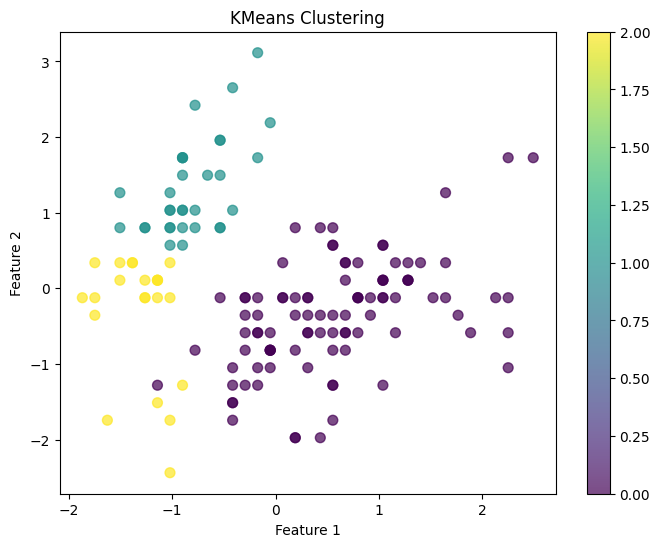

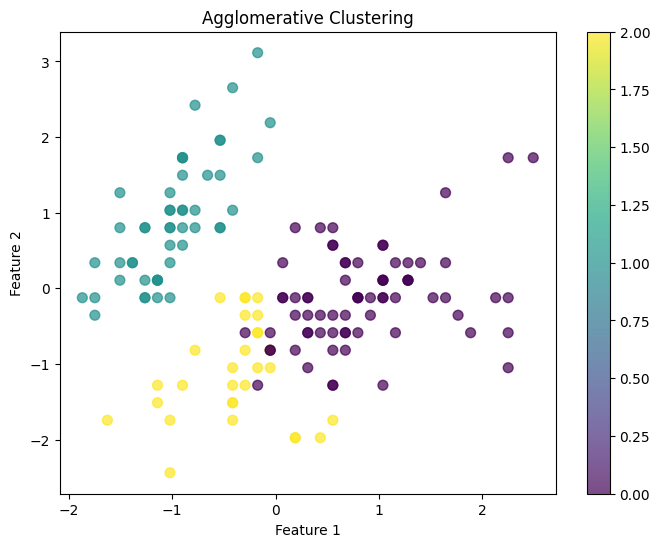

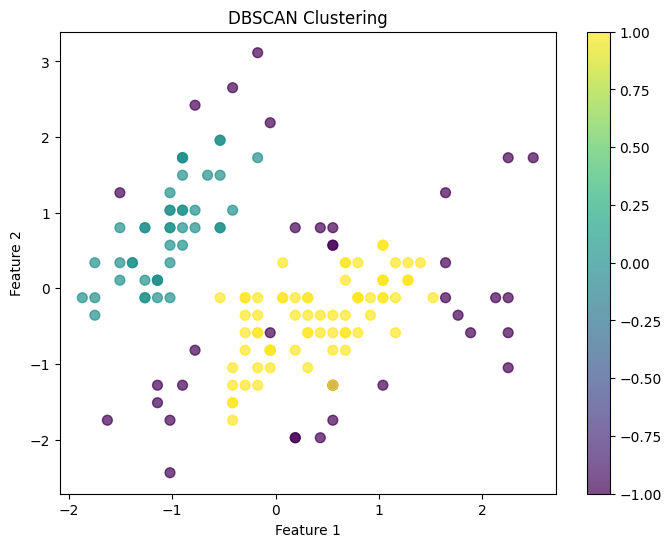

In [6]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(data_url, header=None)
data.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Class"]
data = data.drop("Class", axis=1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

n_clusters = 3

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters)
agglo_labels = agglo.fit_predict(data_scaled)
agglo_silhouette = silhouette_score(data_scaled, agglo_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else "N/A"

results = pd.DataFrame({
    "Algorithm": ["KMeans", "Agglomerative Clustering", "DBSCAN"],
    "Preprocessing": ["StandardScaler"] * 3,
    "No. of Clusters": [n_clusters, n_clusters, len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)],
    "Silhouette Score": [kmeans_silhouette, agglo_silhouette, dbscan_silhouette]
})

print("Results Summary:")
print(results)

def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar()
    plt.show()

plot_clusters(data_scaled, kmeans_labels, "KMeans Clustering")
plot_clusters(data_scaled, agglo_labels, "Agglomerative Clustering")
if len(set(dbscan_labels)) > 1:
    plot_clusters(data_scaled, dbscan_labels, "DBSCAN Clustering")
